<a href="https://colab.research.google.com/github/agustinabenitezzz/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educación nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Arte', 'Música', 'Ciudadanía']

# Crear una lista para almacenar los datos de los alumnos
data = []

# Generar datos aleatorios para 100 alumnos
for i in range(100):
  nombre = f"Nombre{i}"
  apellido = f"Apellido{i}"
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1,10)
  nota2 = random.randint(1,10)
  nota3 = random.randint(1,10)
  faltas = random.randint(0,20)

  data.append([nombre,apellido,dni,materia,nota1,nota2,nota3,faltas])


# Crear el DataFrame
df = pd.DataFrame(data, columns=['Nombre','Apellido','DNI','Materia Escolar','Nota 1er Trimestre','Nota 2do Trimestre','Nota 3er Trimestre','Faltas a clases'])

# Mostrar el DataFrame
df


,Nombre,Apellido,DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Nombre0,Apellido0,73513064,Biología,8,6,9,2
1,Nombre1,Apellido1,77457892,Inglés,9,2,7,19
2,Nombre2,Apellido2,48175726,Química,9,4,5,10
3,Nombre3,Apellido3,71527737,Biología,9,7,10,15
4,Nombre4,Apellido4,87558123,Ciencias Naturales,3,3,2,8
...,...,...,...,...,...,...,...,...
95,Nombre95,Apellido95,19369669,Química,3,3,8,15
96,Nombre96,Apellido96,55194330,Música,3,8,1,7
97,Nombre97,Apellido97,97148163,Matemática,5,6,6,6
98,Nombre98,Apellido98,50951493,Arte,6,4,3,15


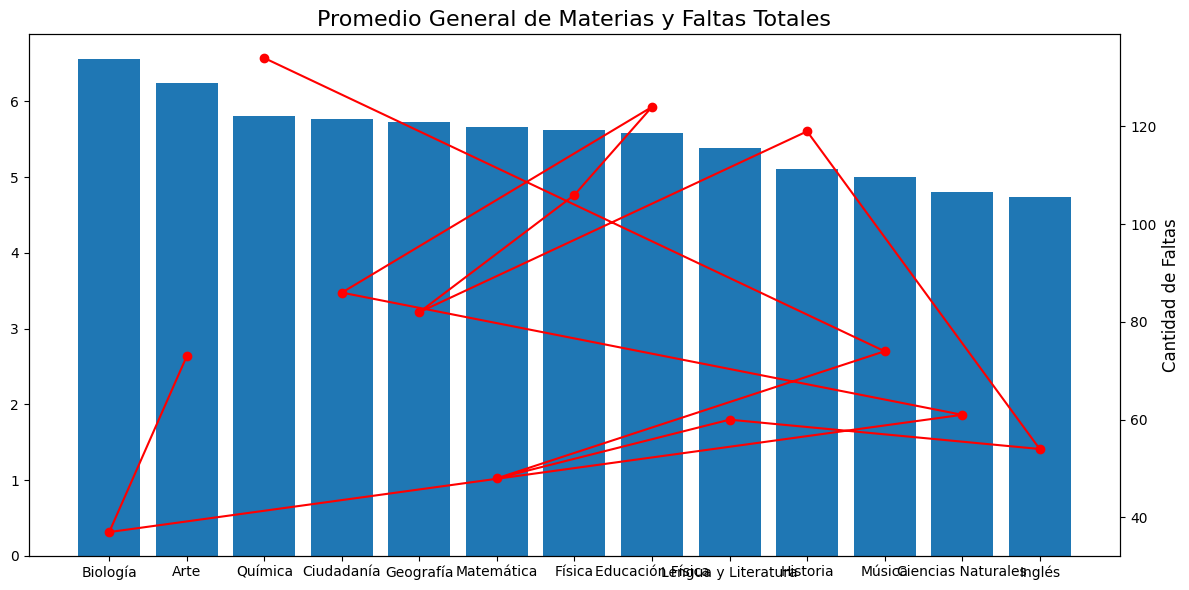

In [10]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedios_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_por_materia.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.bar(promedios_ordenados.index, promedios_ordenados.values, label='Promedio General')
ax2 = plt.twinx()  # Crear un segundo eje y
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, marker='o', color='red', linestyle='-', label='Faltas Totales')


plt.title('Promedio General de Materias y Faltas Totales', fontsize=16)
plt.xlabel('Materia', fontsize=12)


ax2.set_ylabel('Cantidad de Faltas', fontsize=12)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar leyendas
lines2, labels2 = ax2.get_legend_handles_labels()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

In [11]:
df.to_csv("datos_alumnos.csv", index=False)